In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.preprocessing import MinMaxScaler

In [64]:
# # Python program to convert
# import json
# import csv
# import datetime
# # JSON file to CSV
# with open('C:/Users/Administrator/Downloads/response_1640590964914.json') as json_file:
# 	data = json.load(json_file)
# for element in data: 
#     if '_id' in element:
#         del element['_id']
#         del element['userName']
#         del element['userAccNumber']
# data=data[0]
# employee_data=data['userCredit']
# # now we will open a file for writing
# data_file = open('C:/Users/Administrator/Downloads/data_file1.csv', 'w')
# # create the csv writer object
# csv_writer = csv.writer(data_file)
# # Counter variable used for writing
# # headers to the CSV file
# count = 0
# for emp in employee_data:
# 	if count == 0:
# 		# Writing headers of CSV file
# 		header = emp.keys()
# 		csv_writer.writerow(header)
# 		count += 1
# 	# Writing data of CSV file
# 	csv_writer.writerow(emp.values())
# data_file.close()

In [139]:
# read csv file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("C:/Users/Administrator/Desktop/Python/Test.csv"))
df=df.head(252)
# show the dataframe
df = df.replace({'\$':''}, regex = True)
print(df,'/n/n',df.dtypes)
# df

       Account No        DATE               TRANSACTION DETAILS  CHQ.NO.  \
0    409000611074  2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN   
1    409000611074  2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN   
2    409000611074  2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN   
3    409000611074  2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN   
4    409000611074  2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN   
..            ...         ...                               ...      ...   
247  409000611074  2018-01-29  INDO GIBL Indiaforensic STL25011      NaN   
248  409000611074  2018-01-29  INDO GIBL Indiaforensic STL26011      NaN   
249  409000611074  2018-01-29  INDO GIBL Indiaforensic STL27011      NaN   
250  409000611074  2018-01-29  INDO GIBL Indiaforensic STL28011      NaN   
251  409000611074  2018-01-29  INDO GIBL Indiaforensic STL24011      NaN   

     VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  
0    2017-06-29         

In [140]:
df["DATE"] = pd.to_datetime(df.DATE, format="%Y-%m-%d")

In [141]:
df=df.drop(columns=['Account No','TRANSACTION DETAILS','CHQ.NO.','DEPOSIT AMT','VALUE DATE', 'BALANCE AMT'])

In [142]:
df = df.sort_index(ascending=True,axis=0)
df

,DATE,WITHDRAWAL AMT,.
0,2017-06-29,NaN,.
1,2017-07-05,NaN,.
2,2017-07-18,NaN,.
3,2017-08-01,NaN,.
4,2017-08-16,NaN,.
...,...,...,...
247,2018-01-29,135050.0,.
248,2018-01-29,31300.0,.
249,2018-01-29,20500.0,.
250,2018-01-29,5500.0,.


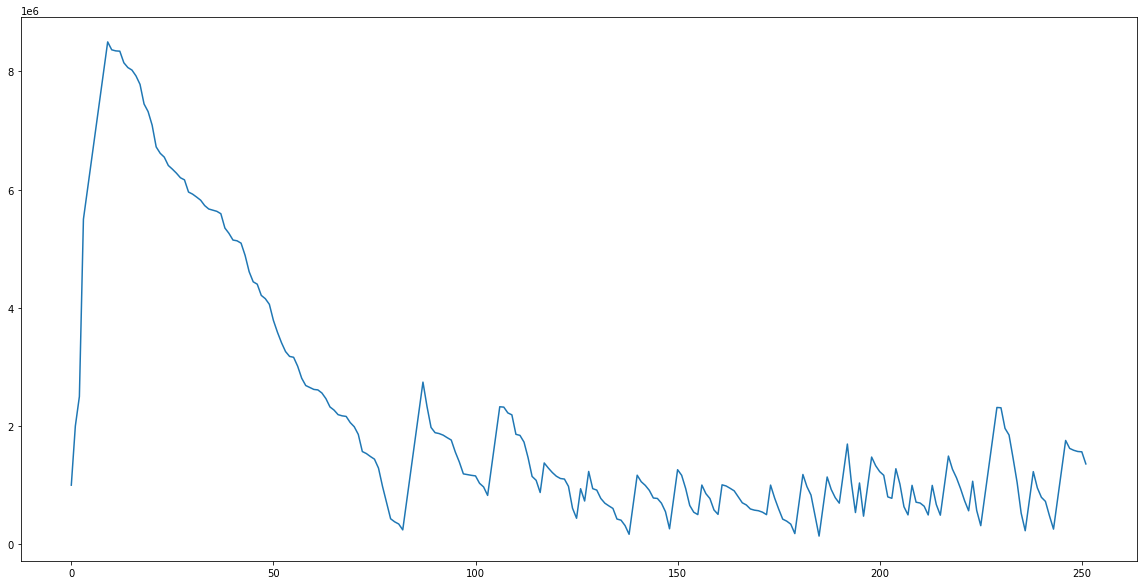

In [131]:
plt.plot(df["BALANCE AMT"],label='Balance amount history')

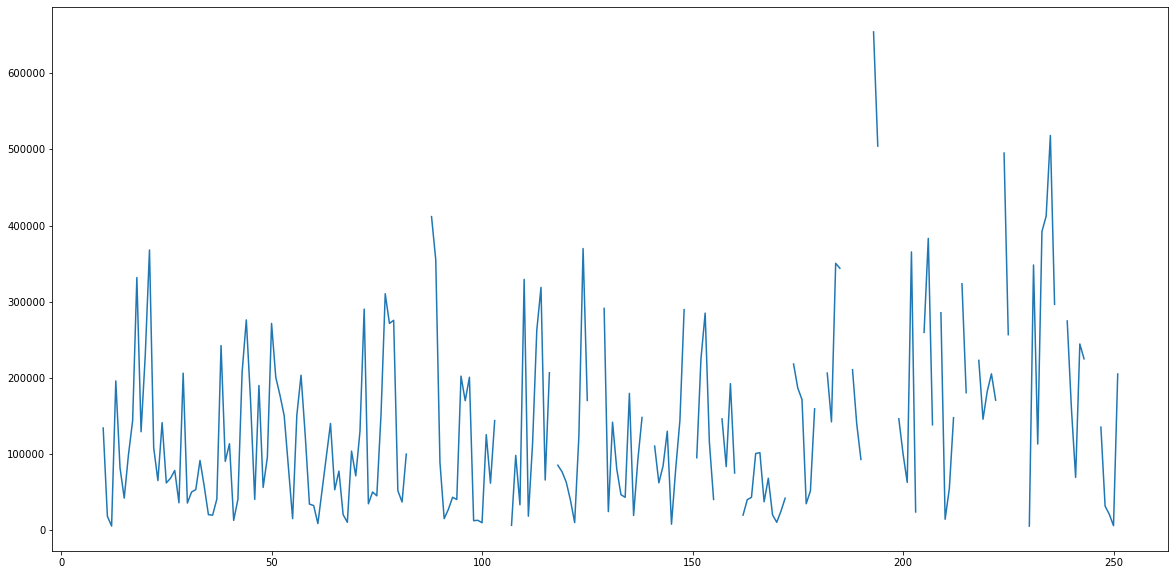

In [143]:
plt.plot(df["WITHDRAWAL AMT"],label='WITHDRAWAL amt history')

In [144]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Withdrawal_amt'])
for i in range(0,len(data)):
    data["Date"][i]=df['DATE'][i]
    data["Withdrawal_amt"][i]=df["WITHDRAWAL AMT"][i]
data.head()

,Date,Withdrawal_amt
0,2017-06-29 00:00:00,NaN
1,2017-07-05 00:00:00,NaN
2,2017-07-18 00:00:00,NaN
3,2017-08-01 00:00:00,NaN
4,2017-08-16 00:00:00,NaN


In [145]:
data.index=data.Date
data.drop('Date',axis=1,inplace=True)

In [146]:
scaler=MinMaxScaler(feature_range=(0,1))
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,int(len(train_data))):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [147]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [150]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
x_train_data=np.asarray(x_train_data)
y_train_data=np.asarray(y_train_data)
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

140/140 - 3s - loss: nan - 3s/epoch - 22ms/step


In [151]:
predicted_bal_amt=lstm_model.predict(X_test)
predicted_bal_amt=scaler.inverse_transform(predicted_bal_amt)

In [85]:
int(len(data))

2

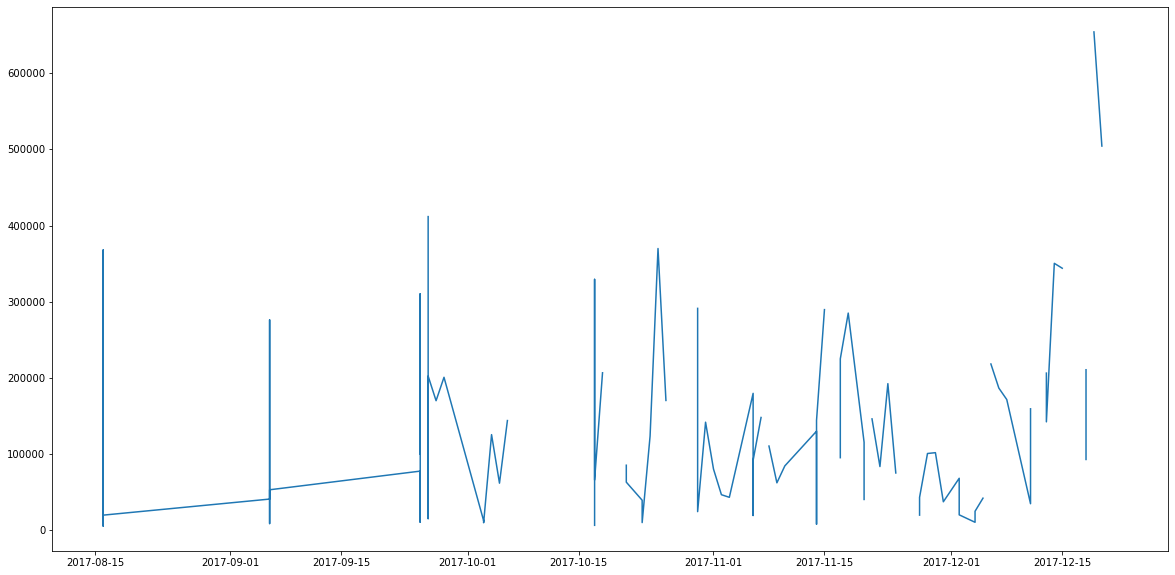

In [153]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_bal_amt
plt.plot(train_data["Balance_amt"])
plt.plot(valid_data["Predictions"])